In [4]:
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict

In [5]:
from pmdarima import arima

In [26]:
df_1 = pd.read_csv('C:/Users/lenovo/Desktop/gani/ResearchProject/SBI_py.csv')
df_1.head()

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Apr-13,226.43,NaN,NaN,NaN,NaN,NaN
1,May-13,204.68,NaN,NaN,NaN,NaN,NaN
2,Jun-13,195.38,NaN,NaN,NaN,NaN,NaN
3,Jul-13,170.84,NaN,NaN,NaN,NaN,NaN
4,Aug-13,151.90,NaN,NaN,NaN,NaN,NaN


In [27]:
df_2.dtypes

Price         float64
first_diff    float64
dtype: object

In [28]:
df_2 = df_1[['Date','Price']]
df_2.tail()

,Date,Price
115,Nov-22,602.45
116,Dec-22,613.70
117,Jan-23,553.50
118,Feb-23,522.80
119,Mar-23,523.75


In [29]:
#df_2['Price'] = pd.to_numeric(df_2['Price'].str.replace(',', ''), errors='coerce')

In [30]:
from datetime import datetime
df_2['Date'] = pd.to_datetime(df_2['Date'], format='%b-%y').dt.strftime('%Y-%m')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14624\4214241446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Date'] = pd.to_datetime(df_2['Date'], format='%b-%y').dt.strftime('%Y-%m')


In [31]:
df_2.set_index('Date',inplace=True)

In [32]:
df_2.head()

,Price
Date,
2013-04,226.43
2013-05,204.68
2013-06,195.38
2013-07,170.84
2013-08,151.90


<AxesSubplot:xlabel='Date'>

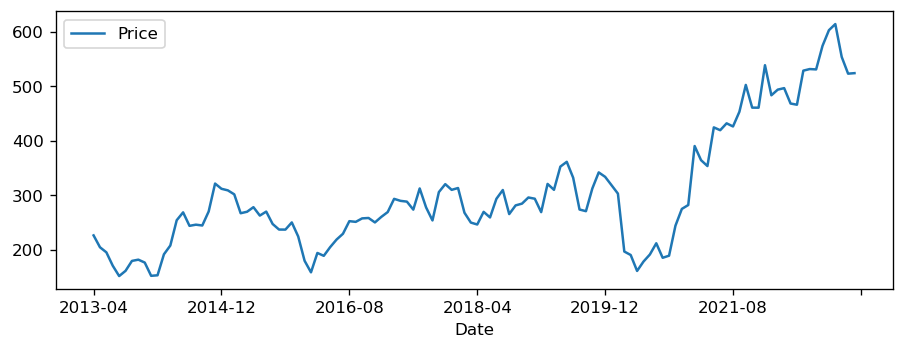

In [33]:
df_2.plot()

In [34]:
# Define your function with a valid parameter name (e.g., 'close_price')

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Price):
    result = adfuller(Price)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary")

# Call the function with your 'Close Price' column as the argument
adfuller_test(df_2['Price'])

ADF Test Statistic : -0.8893093584650061
p-value : 0.7914726094119048
#Lags Used : 0
Number of Observations Used : 119
Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary


In [35]:
from pmdarima.arima.utils import ndiffs
ndiffs(df_2.Price,test="adf")

1

In [36]:
df_2['first_diff'] = df_2['Price'].diff().dropna()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14624\1360018562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['first_diff'] = df_2['Price'].diff().dropna()


In [37]:
df_2.dropna(subset=['first_diff'], inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14624\2139689955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.dropna(subset=['first_diff'], inplace=True)


In [38]:
# Define your function with a valid parameter name (e.g., 'close_price')

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Price):
    result = adfuller(Price)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary")

# Call the function with your 'Close Price' column as the argument
adfuller_test(df_2['first_diff'])

ADF Test Statistic : -10.738855691047926
p-value : 2.852281046603196e-19
#Lags Used : 0
Number of Observations Used : 118
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary


In [25]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings to maintain cleanliness (Optional)
warnings.filterwarnings("ignore")

# Your 'train' data should be defined here

# Define the range of values for p, d, q
p_values = range(4)  # 0, 1, 2, 3
d_values = range(4)  # 0, 1, 2, 3
q_values = range(4)  # 0, 1, 2, 3

# Iterate through all combinations of p, d, q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(df_2.Price, order=(p, d, q))
        fitted = model.fit()
        print(f"ARIMA(p={p}, d={d}, q={q}) - AIC: {fitted.aic}")
        print(fitted.summary())
    except:
        continue

ARIMA(p=0, d=0, q=0) - AIC: 1461.3036196405747
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  119
Model:                          ARIMA   Log Likelihood                -728.652
Date:                Sun, 19 Nov 2023   AIC                           1461.304
Time:                        17:49:54   BIC                           1466.862
Sample:                    05-01-2013   HQIC                          1463.561
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        304.1274     13.710     22.183      0.000     277.256     330.999
sigma2       1.22e+04   2019.000      6.042      0.000    8242.440    1.62e+04
Ljung

In [27]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings to maintain cleanliness (Optional)
warnings.filterwarnings("ignore")

# Your 'train' data should be defined here

# Define the range of values for p, d, q
p_values = range(4)  # 0, 1, 2, 3
d_values = range(4)  # 0, 1, 2, 3
q_values = range(4)  # 0, 1, 2, 3

best_aic = float("inf")
best_order = None

# Iterate through all combinations of p, d, q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(df_2.Price, order=(p, d, q))
        fitted = model.fit()
        current_aic = fitted.aic

        print(f"ARIMA(p={p}, d={d}, q={q}) - AIC: {current_aic}")

        # Check if the current model has a lower AIC than the previous best model
        if current_aic < best_aic:
            best_aic = current_aic
            best_order = (p, d, q)

    except:
        continue

if best_order is not None:
    print("\nBest Model:")
    print(f"ARIMA(p={best_order[0]}, d={best_order[1]}, q={best_order[2]}) - AIC: {best_aic}")
    best_model = ARIMA(df_2.Price, order=best_order)
    best_fitted = best_model.fit()
    print(best_fitted.summary())
else:
    print("No valid model found.")


ARIMA(p=0, d=0, q=0) - AIC: 1461.3036196405747
ARIMA(p=0, d=0, q=1) - AIC: 1335.9338737481212
ARIMA(p=0, d=0, q=2) - AIC: 1277.104569902133
ARIMA(p=0, d=0, q=3) - AIC: 1242.4722671135678
ARIMA(p=0, d=1, q=0) - AIC: 1140.0150297892694
ARIMA(p=0, d=1, q=1) - AIC: 1141.9964568349076
ARIMA(p=0, d=1, q=2) - AIC: 1142.3217284694147
ARIMA(p=0, d=1, q=3) - AIC: 1143.112917880152
ARIMA(p=0, d=2, q=0) - AIC: 1211.0848308965135
ARIMA(p=0, d=2, q=1) - AIC: 1137.1834322746631
ARIMA(p=0, d=2, q=2) - AIC: 1139.1608531755976
ARIMA(p=0, d=2, q=3) - AIC: 1139.3990249869598
ARIMA(p=0, d=3, q=0) - AIC: 1324.711841375003
ARIMA(p=0, d=3, q=1) - AIC: 1208.5075476716434
ARIMA(p=0, d=3, q=2) - AIC: 1141.562348938487
ARIMA(p=0, d=3, q=3) - AIC: 1143.4648802658617
ARIMA(p=1, d=0, q=0) - AIC: 1155.1719561916555
ARIMA(p=1, d=0, q=1) - AIC: 1157.0483099473286
ARIMA(p=1, d=0, q=2) - AIC: 1157.857654621737
ARIMA(p=1, d=0, q=3) - AIC: 1158.0434117854072
ARIMA(p=1, d=1, q=0) - AIC: 1142.0000773249994
ARIMA(p=1, d=1, q=

#PLOTTING

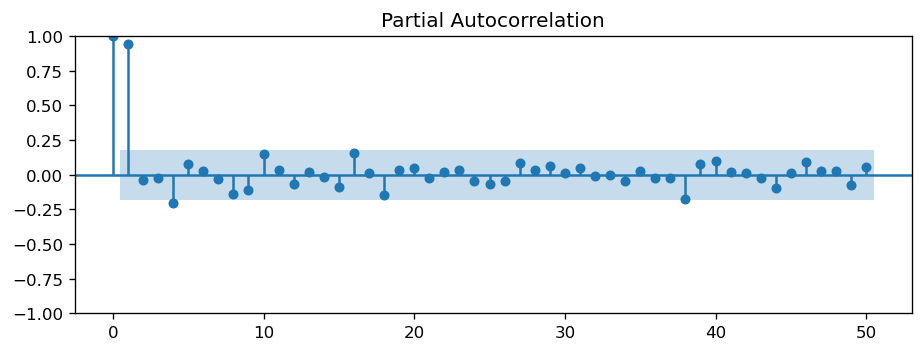

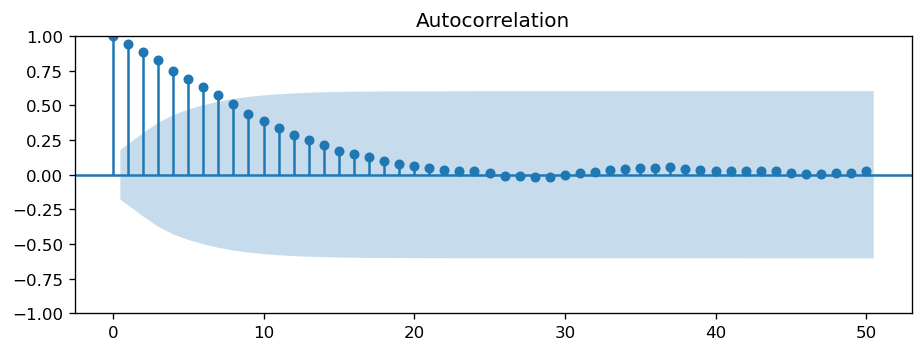

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

#fig, axes = plt.subplots(1, 2, sharex=True)
#axes[0].plot(df_2.first_diff); axes[0].set_title('first_diff')
#axes[1].set(ylim=(0,5))
plot_pacf(df_2.Price.dropna(),lags=50)#, ax=axes[1])
plot_acf(df_2.Price.dropna(),lags =50)

plt.show()

In [40]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

model = ARIMA(df_2['Price'], order=(0,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  119
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -566.592
Date:                Sun, 19 Nov 2023   AIC                           1137.183
Time:                        19:23:27   BIC                           1142.708
Sample:                    05-01-2013   HQIC                          1139.426
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9982      0.274     -3.649      0.000      -1.534      -0.462
sigma2       905.2191    242.061      3.740      0.000     430.788    1379.650
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


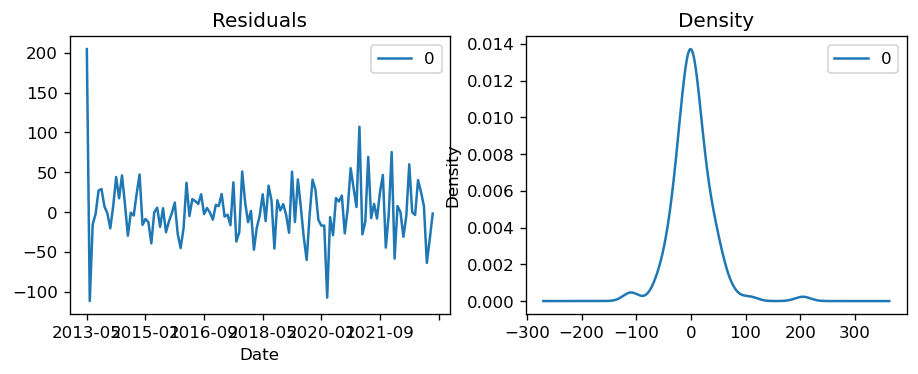

In [41]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

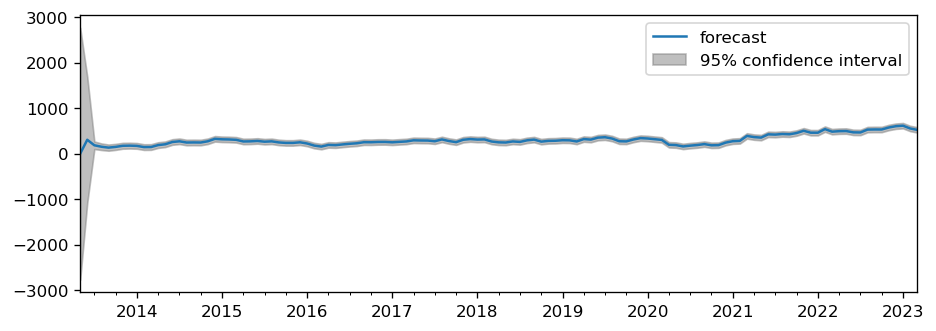

In [42]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pandas as pd
# Actual vs Fitted
#model_fit.plot_predict(dynamic=False)
plot_predict(model_fit,dynamic=False)
plt.show()

In [43]:
from pmdarima import auto_arima
#try diff order and assign a score ,Goal to minimise AIC (p,d,q)
stepwise_fit = auto_arima(df_2['Price'],trace =True )
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1143.624, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1141.056, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1143.056, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1143.055, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1140.015, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1143.168, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.071 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  119
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -569.008
Date:                Sun, 19 Nov 2023   AIC                           1140.015
Time:                        19:30:22   BIC                           1142.786
Sample:                    05-01-2013   HQIC                          1141.140
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       903.5494     85.334     10.588      0.000     736.297    1070.802
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.96
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.44   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

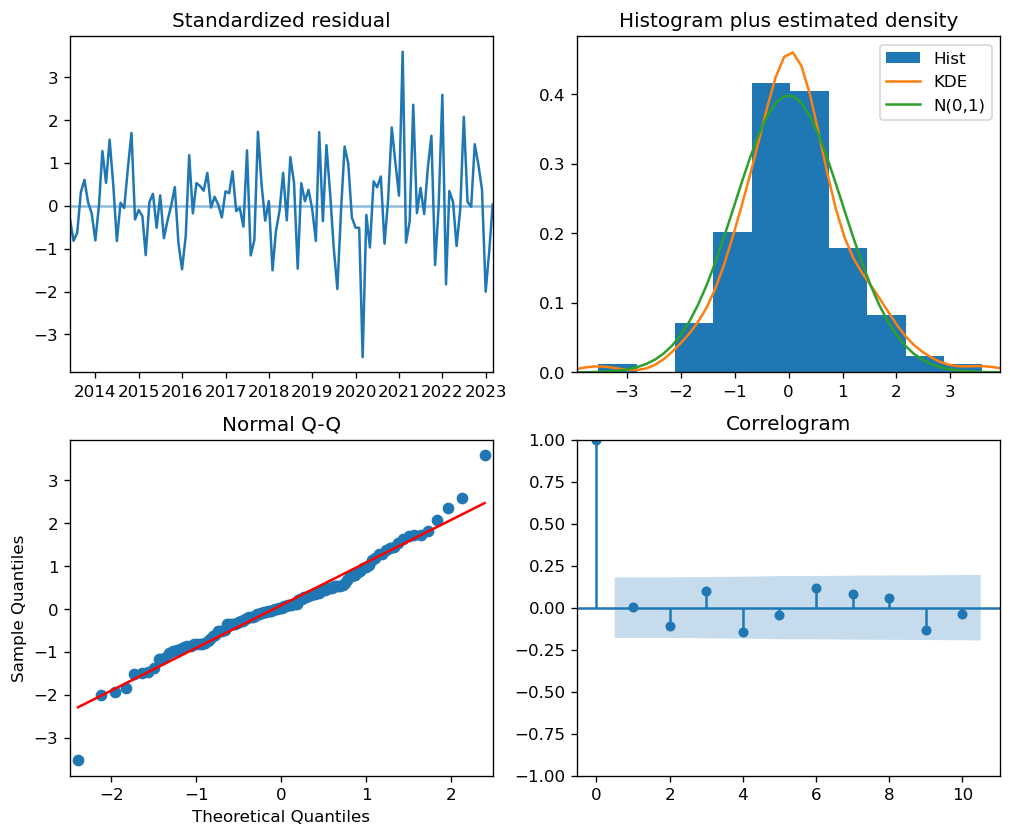

In [44]:
stepwise_fit.plot_diagnostics(figsize=(10,8))
plt.show()